In [1]:
from sqlalchemy import create_engine

<h1>Connect To Engine<h1>

In [2]:
from dotenv import load_dotenv
import os

load_dotenv('pwd.env')

db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')
db_host = os.getenv("DB_HOST")

In [3]:
username = db_user
password = db_password
host = db_host
port = '5433'
database = 'Amazon_DWH'

connection_string = f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}"
engine = create_engine(connection_string)

try:
    with engine.connect() as connection:
        print("connection was successful!")
except Exception as e:
    print("connection failed:", e)

connection was successful!


<h1>Business Question<h1>
<h4>1-Retrieve total Amount for products sales grouped by the fulfilment party <br>
2-Rereieve number of pieces sold for each category<h4>

In [35]:
import pandas as pd 
pd.set_option('display.expand_frame_repr', False)
#QW 1
Sum_Amount= pd.read_sql(
    '''
    SELECT "Fulfilment" , SUM("Amount")FROM "Cl_Merged_Amazon_Sale_Report"
    GROUP BY "Fulfilment"
    ''', engine
)
print(Sum_Amount)
print("---------------------------------------------------------------------")
#QW 2
Sum_Qty=pd.read_sql(
    '''
    SELECT "Category",SUM("Qty") FROM "Cl_Merged_Amazon_Sale_Report" GROUP BY "Category"
    '''  ,engine
)
print(Sum_Qty)


  Fulfilment        sum
0     Amazon  721234.00
1   Merchant  198682.57
---------------------------------------------------------------------
   Category    sum
0  Trousers  109.0
1     Shirt  567.0
2    Wallet    7.0
3     Socks    1.0
4   Blazzer  141.0
5     Shoes    2.0
6   Perfume    7.0
7   T-shirt  577.0


<h1>VisualiZation From Database<h1>

In [30]:
import pandas as pd 
pd.set_option('display.expand_frame_repr', False)
# use to visulaization
query_status_count= pd.read_sql(
    '''
    SELECT "Status", COUNT(*) as "order_count"
    FROM "Cl_Merged_Amazon_Sale_Report"
    GROUP BY "Status"
    ORDER BY "order_count" DESC;
    ''', engine
)
print(query_status_count)
query_discounted_price =pd.read_sql( 
'''
SELECT "discounted_price_INR"
FROM "Cl_Merged_Amazon_Sale_Report";
''', engine)

print(query_discounted_price)

                         Status  order_count
0                       Shipped         1079
1  Shipped - Delivered to Buyer          261
2                     Cancelled          111
3  Shipped - Returned to Seller           10
4   Shipped - Rejected by Buyer            1
      discounted_price_INR
0                    399.0
1                    199.0
2                    199.0
3                    329.0
4                    154.0
...                    ...
1457                 379.0
1458                2280.0
1459                2219.0
1460                1399.0
1461                2863.0

[1462 rows x 1 columns]


C:\Users\asmaa\AppData\Local\Temp\ipykernel_10580\3739589562.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=query_status_count, x='Status', y='order_count', palette="Set2")


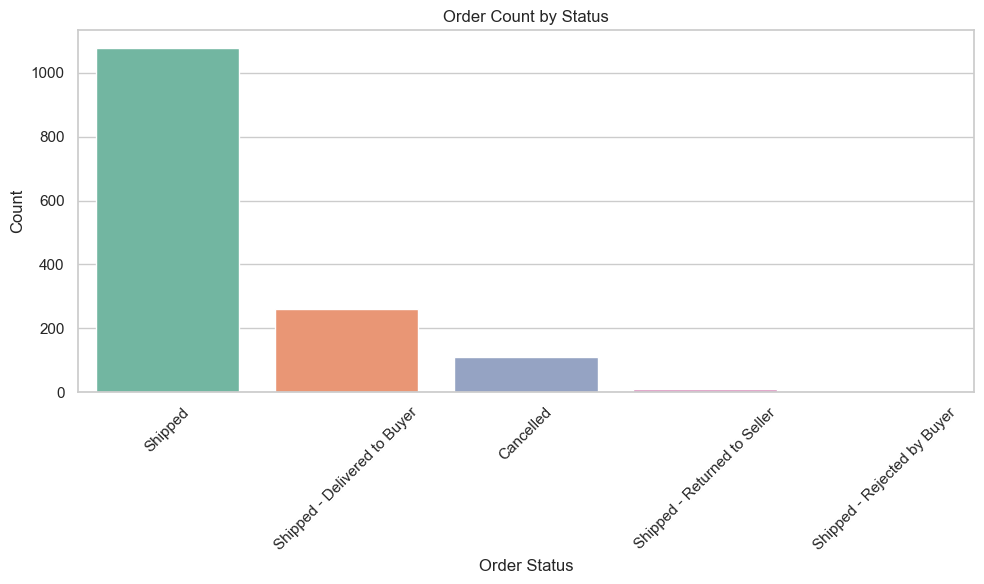

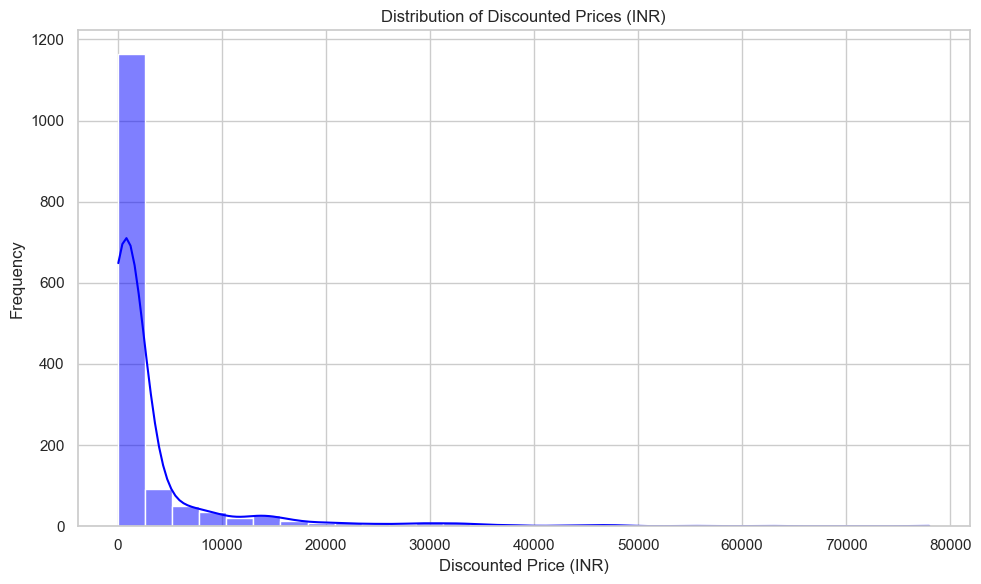

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=query_status_count, x='Status', y='order_count', palette="Set2")
plt.title('Order Count by Status')
plt.ylabel('Count')
plt.xlabel('Order Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Distribution of Discounted Prices
plt.figure(figsize=(10, 6))
sns.histplot(query_discounted_price['discounted_price_INR'], kde=True, color="blue", bins=30)
plt.title('Distribution of Discounted Prices (INR)')
plt.xlabel('Discounted Price (INR)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


<h1>Read From Database To Create ML Model<h1>

In [27]:
df=pd.read_sql(
    '''
    select* from "Cl_Merged_Amazon_Sale_Report"
    ''' , engine
    
)